In [24]:
# Зависимости
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree

from sklearn.metrics import mean_squared_error, f1_score

In [25]:
# Генерируем уникальный seed
my_code = "Saskovets"
seed_limit = 2 ** 32
my_seed = int.from_bytes(my_code.encode(), "little") % seed_limit

In [26]:
# Читаем данные из файла
example_data = pd.read_csv("datasets/Fish.csv")

In [27]:
example_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [28]:
# Определим размер валидационной и тестовой выборок
val_test_size = round(0.2*len(example_data))
print(val_test_size)

32


In [29]:
# Создадим обучающую, валидационную и тестовую выборки
random_state = my_seed
train_val, test = train_test_split(example_data, test_size=val_test_size, random_state=random_state)
train, val = train_test_split(train_val, test_size=val_test_size, random_state=random_state)
print(len(train), len(val), len(test))

95 32 32


In [30]:
# Значения в числовых столбцах преобразуем к отрезку [0,1].
# Для настройки скалировщика используем только обучающую выборку.
num_columns = ['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']

ct = ColumnTransformer(transformers=[('numerical', MinMaxScaler(), num_columns)], remainder='passthrough')
ct.fit(train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('numerical', MinMaxScaler(),
                                 ['Weight', 'Length1', 'Length2', 'Length3',
                                  'Height', 'Width'])])

In [31]:
# Преобразуем значения, тип данных приводим к DataFrame
sc_train = pd.DataFrame(ct.transform(train))
sc_test = pd.DataFrame(ct.transform(test))
sc_val = pd.DataFrame(ct.transform(val))

In [32]:
# Устанавливаем названия столбцов
column_names = num_columns + ['Species']
sc_train.columns = column_names
sc_test.columns = column_names
sc_val.columns = column_names

In [33]:
sc_train

,Weight,Length1,Length2,Length3,Height,Width,Species
0,0.075,0.245361,0.244186,0.269928,0.254588,0.332938,Roach
1,0.226875,0.387629,0.399225,0.447464,0.638566,0.505016,Bream
2,0.48125,0.769072,0.767442,0.768116,0.345449,0.641425,Pike
3,0.06875,0.257732,0.263566,0.266304,0.220221,0.436775,Perch
4,0.105625,0.298969,0.302326,0.333333,0.336998,0.413094,Roach
...,...,...,...,...,...,...,...
90,0.78125,0.917526,0.922481,0.922101,0.519944,0.879848,Pike
91,0.003688,0.0,0.0,0.0,0.022265,0.053408,Perch
92,0.5,0.540206,0.542636,0.557971,0.582334,0.818897,Whitefish
93,0.596875,0.56701,0.583333,0.637681,0.949328,0.777167,Bream


In [34]:
# Задание №1 - анализ деревьев принятия решений в задаче регрессии
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
# criterion : {“mse”, “friedman_mse”, “mae”, “poisson”}, default=”mse”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [35]:
# Выбираем 4 числовых переменных, три их них будут предикторами, одна - зависимой переменной
n = 4
labels = random.sample(num_columns, n)

y_label = labels[0]
x_labels = labels[1:]

print(x_labels)
print(y_label)

['Length2', 'Weight', 'Length1']
Height


In [36]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [37]:
x_train

,Length2,Weight,Length1
0,0.244186,0.075,0.245361
1,0.399225,0.226875,0.387629
2,0.767442,0.48125,0.769072
3,0.263566,0.06875,0.257732
4,0.302326,0.105625,0.298969
...,...,...,...
90,0.922481,0.78125,0.917526
91,0.0,0.003688,0.0
92,0.542636,0.5,0.540206
93,0.583333,0.596875,0.56701


In [38]:
# Создайте 4 модели с различными критериями ветвления criterion: 'mse', 'friedman_mse', 'mae', 'poisson'.
# Решите получившуюся задачу регрессии с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры splitter, max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.

In [39]:
r_model1 = DecisionTreeRegressor(criterion='squared_error')
r_model2 = DecisionTreeRegressor(criterion='friedman_mse', splitter='best', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model3 = DecisionTreeRegressor(criterion='absolute_error', splitter='random', max_depth=3, min_samples_split=4, min_samples_leaf=0.5)
r_model4 = DecisionTreeRegressor(criterion='poisson', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [40]:
r_models = []
r_models.append(r_model1)
r_models.append(r_model2)
r_models.append(r_model3)
r_models.append(r_model4)

In [41]:
for model in r_models:
    model.fit(x_train, y_train)

In [42]:
mse_list = []
for model in r_models:
    val_pred = model.predict(x_val)
    mse = mean_squared_error(y_val, val_pred)
    mse_list.append(mse)
    print(mse)

0.011539982129446603
0.04837693106290245
0.06317217057263277
0.0086058673180354


In [43]:
print("Модель с минимальной MSE - ", mse_list.index(min(mse_list))+1)

Модель с минимальной MSE -  4


In [44]:
i_min = mse_list.index(min(mse_list))
r_model = r_models[i_min]
r_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'poisson',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [45]:
test_pred = r_model.predict(x_test)
mse = mean_squared_error(y_test, test_pred)
print(mse)

0.024085175407330572


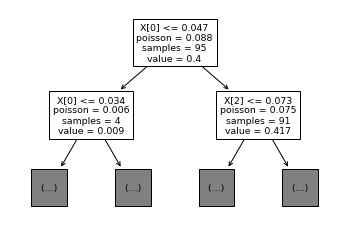

In [46]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(r_model, max_depth=1)
plt.show()

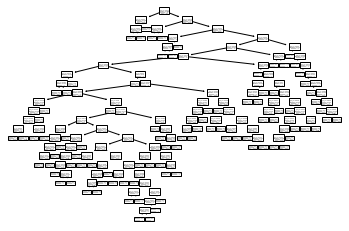

In [47]:
plot_tree(r_model)
plt.show()

In [48]:
# Задание №2 - анализ деревьев принятия решений в задаче классификации
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# criterion : {“gini”, “entropy”}, default=”gini”
# splitter : {“best”, “random”}, default=”best”
# max_depth : int, default=None
# min_samples_split : int or float, default=2
# min_samples_leaf : int or float, default=1

In [49]:
# Выбираем 2 числовых переменных, которые будут параметрами элементов набора данных
# Метка класса всегда 'Species'
n = 2
x_labels = random.sample(num_columns, n)
y_label = 'Species'

print(x_labels)
print(y_label)

['Height', 'Weight']
Species


In [50]:
# Отберем необходимые параметры
x_train = sc_train[x_labels]
x_test = sc_test[x_labels]
x_val = sc_val[x_labels]

y_train = sc_train[y_label]
y_test = sc_test[y_label]
y_val = sc_val[y_label]

In [51]:
x_train

,Height,Weight
0,0.254588,0.075
1,0.638566,0.226875
2,0.345449,0.48125
3,0.220221,0.06875
4,0.336998,0.105625
...,...,...
90,0.519944,0.78125
91,0.022265,0.003688
92,0.582334,0.5
93,0.949328,0.596875


In [52]:
# Создайте 4 модели с различными критериями ветвления criterion : 'gini', 'entropy' и splitter : 'best', 'random'.
# Решите получившуюся задачу классификации с помощью созданных моделей и сравните их эффективность.
# При необходимости применяйте параметры max_depth, min_samples_split, min_samples_leaf
# Укажите, какая модель решает задачу лучше других.

In [53]:
d_model1 = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model2 = DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model3 = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1)
d_model4 = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=None, min_samples_split=2, min_samples_leaf=1)

In [54]:
d_models = []
d_models.append(d_model1)
d_models.append(d_model2)
d_models.append(d_model3)
d_models.append(d_model4)

In [55]:
for model in d_models:
    model.fit(x_train, y_train)

In [56]:
f1_list = []
for model in d_models:
    val_pred = model.predict(x_val)
    f1 = f1_score(y_val, val_pred, average='weighted')
    f1_list.append(f1)
    print(f1)

0.6026785714285714
0.6217038690476191
0.6375757862826827
0.6033506944444444


In [57]:
print("Модель с максимальным значением F1: ", f1_list.index(max(f1_list))+1)

Модель с максимальным значением F1:  3


In [58]:
i_max = f1_list.index(max(f1_list))
d_model = d_models[i_max]
d_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [59]:
test_pred = d_model.predict(x_test)
f1 = f1_score(y_test, test_pred, average='weighted')
print(f1)

0.6751736111111111


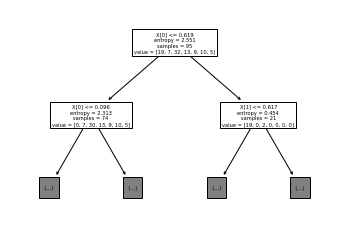

In [60]:
# Вывод на экран дерева tree.
# max_depth - максимальная губина отображения, по умолчанию выводится дерево целиком.
plot_tree(d_model, max_depth=1)
plt.show()

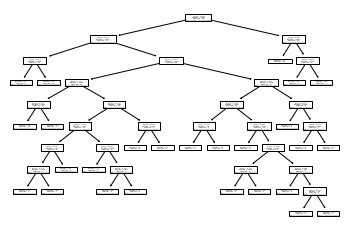

In [61]:
plot_tree(d_model)
plt.show()